# Dataset

In this part, you will use the car evaluation database, which was  derived from a simple hierarchical decision model. (M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.).

The model uses six attributes:

*   buying: Car Buying Price. This attribute has four values: vhigh, high, med, low.
*   maint: Price of the Maintenance.  This attribute has four values: vhigh, high, med, low.
*   doors: Number of Doors. This attribute has four values: 2, 3, 4, 5-more.
*   persons: Capacity in terms of persons to carry. This attribute has three values: 2, 4, more.
*   lug_boot: The Size of Luggage Boot. This attribute has three values: small, med, big.
*   safety: Estimated Safety of the Car. This attribute has three values: low, med, high.

Using the above attributes, it is required to use a decision tree to evalute the car into one of the given values:


*   unacc: Unacceptable
*   acc: Acceptable
*   good: Good
*   vgood: Very Good

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('car.csv')

In [3]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,car_acc
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df = data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   car_acc   1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,car_acc
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [7]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
car_acc     0
dtype: int64

In [8]:
df['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [9]:
df['maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [10]:
df['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [11]:
df['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [12]:
df['lug_boot'].unique()

array(['small', 'med', 'big'], dtype=object)

In [13]:
df['safety'].unique()

array(['low', 'med', 'high'], dtype=object)

In [14]:
df['car_acc'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [15]:
# label encoder

# buying,maint,safety
L_H_Dict = {
    'vhigh' : 4, 'high' : 3, 'med' : 2, 'low' : 1
}
df['buying'] = df['buying'].map(L_H_Dict)
df['maint'] = df['maint'].map(L_H_Dict)
df['safety'] = df['safety'].map(L_H_Dict)

# doors
df['doors'].replace('5more', '5',inplace=True)

# persons
df['persons'].replace('more', '6',inplace=True)

# lug_boot
S_B_Dict = {
    'big' : 3, 'med' : 2, 'small' : 1
}
df['lug_boot'] = df['lug_boot'].map(S_B_Dict)

# car_acc
car_acc_Dict = {
    'unacc' : 1, 'acc' : 2, 'good' : 3, 'vgood' : 4
}
df['car_acc'] = df['car_acc'].map(car_acc_Dict)



In [16]:
df

,buying,maint,doors,persons,lug_boot,safety,car_acc
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1
...,...,...,...,...,...,...,...
1723,1,1,5,6,2,2,3
1724,1,1,5,6,2,3,4
1725,1,1,5,6,3,1,1
1726,1,1,5,6,3,2,3


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   int64 
 1   maint     1728 non-null   int64 
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   int64 
 5   safety    1728 non-null   int64 
 6   car_acc   1728 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 94.6+ KB


In [18]:
df = df.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   car_acc   1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [19]:
X = df.drop(['car_acc'], axis=1)
y = df['car_acc']

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 , stratify=y)

## Models:


In [20]:
# LogisticRegression model 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

y_predect_train = model.predict(X_train)
y_predect_test  = model.predict(X_test)

# Model Score 
from sklearn.metrics import classification_report

print("Train Report:")
print(classification_report(y_train, y_predect_train))
print("__________________________________________________________")
print("Test Report:")
print(classification_report(y_test, y_predect_test))

Train Report:
              precision    recall  f1-score   support

           1       0.89      0.93      0.91       847
           2       0.68      0.62      0.65       269
           3       0.64      0.48      0.55        48
           4       0.76      0.71      0.74        45

    accuracy                           0.83      1209
   macro avg       0.74      0.68      0.71      1209
weighted avg       0.83      0.83      0.83      1209

__________________________________________________________
Test Report:
              precision    recall  f1-score   support

           1       0.87      0.94      0.90       363
           2       0.69      0.58      0.63       115
           3       0.57      0.38      0.46        21
           4       0.82      0.70      0.76        20

    accuracy                           0.83       519
   macro avg       0.74      0.65      0.69       519
weighted avg       0.82      0.83      0.82       519



D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# AdaBoostClassifier model 
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=0)
model.fit(X_train, y_train)

y_predect_train = model.predict(X_train)
y_predect_test  = model.predict(X_test)

# Model Score 
from sklearn.metrics import classification_report

print("Train Report:")
print(classification_report(y_train, y_predect_train))
print("__________________________________________________________")
print("Test Report:")
print(classification_report(y_test, y_predect_test))

Train Report:
              precision    recall  f1-score   support

           1       0.87      0.95      0.91       847
           2       0.72      0.48      0.57       269
           3       0.64      0.92      0.75        48
           4       0.85      0.76      0.80        45

    accuracy                           0.84      1209
   macro avg       0.77      0.77      0.76      1209
weighted avg       0.83      0.84      0.82      1209

__________________________________________________________
Test Report:
              precision    recall  f1-score   support

           1       0.88      0.95      0.91       363
           2       0.74      0.50      0.60       115
           3       0.59      0.76      0.67        21
           4       0.75      0.90      0.82        20

    accuracy                           0.84       519
   macro avg       0.74      0.78      0.75       519
weighted avg       0.83      0.84      0.83       519



In [22]:
# DecisionTree model 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

y_predect_train = dt.predict(X_train)
y_predect_test  = dt.predict(X_test)

# Model Score 
from sklearn.metrics import classification_report

print("Train Report:")
print(classification_report(y_train, y_predect_train))
print("__________________________________________________________")
print("Test Report:")
print(classification_report(y_test, y_predect_test))

Train Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       847
           2       1.00      1.00      1.00       269
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        45

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

__________________________________________________________
Test Report:
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       363
           2       0.98      0.97      0.98       115
           3       0.83      0.90      0.86        21
           4       0.86      0.90      0.88        20

    accuracy                           0.98       519
   macro avg       0.92      0.94      0.93       519
weighted avg       0.98      0.98      0.98       519



In [23]:
# RandomForest model 
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=0)
RF.fit(X_train, y_train)

y_predect_train = RF.predict(X_train)
y_predect_test  = RF.predict(X_test)

# Model Score 
from sklearn.metrics import classification_report

print("Train Report:")
print(classification_report(y_train, y_predect_train))
print("__________________________________________________________")
print("Test Report:")
print(classification_report(y_test, y_predect_test))

Train Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       847
           2       1.00      1.00      1.00       269
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        45

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

__________________________________________________________
Test Report:
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       363
           2       0.94      0.97      0.96       115
           3       0.89      0.81      0.85        21
           4       0.86      0.90      0.88        20

    accuracy                           0.97       519
   macro avg       0.92      0.92      0.92       519
weighted avg       0.98      0.97      0.97       519



### DecisionTree model is the best model

## Feature importances:

<AxesSubplot:>

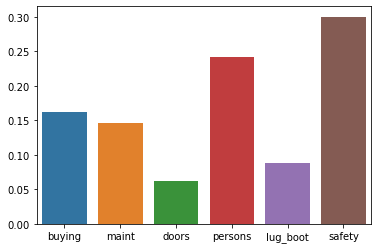

In [24]:
importance = RF.feature_importances_
sns.barplot(x=X.columns, y=importance)

<AxesSubplot:>

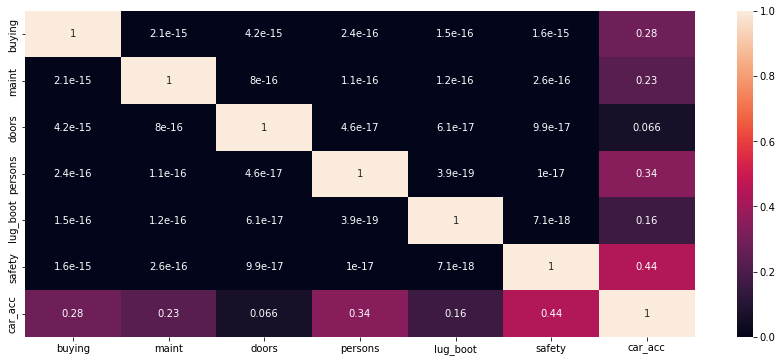

In [25]:
plt.figure(figsize=(15,6))
sns.heatmap(np.abs(df.corr()), annot=True)

## feature importances same as correlation 